In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Support 3D graphing

import numpy as np
import pandas as pd

from pprint import pprint

# Machine Learning - Linear Models - Regression
from sklearn.linear_model import LinearRegression  # TBD
from sklearn.linear_model import Lasso             # TBD
from sklearn.linear_model import Ridge             # TBD
from sklearn.linear_model import ElasticNet        # TBD

# Machine Learning - Linear Models - Classification
from sklearn.linear_model import LogisticRegression   # Linear model for classification

# Machine Learning - Data Preparation and Pre-Processing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder   # Convert categorical integer features (X) to One-Hot encoded values
from sklearn.preprocessing import LabelEncoder    # Convert categorical labeled values to categorical integer values
from sklearn.preprocessing import LabelBinarizer  # Convert categorical labeled values to Binary encoded values

from sklearn.preprocessing import StandardScaler  # Scale numerical features to standard normal distribution
from sklearn.preprocessing import MinMaxScaler    # Scale numerical values based upon mix/max values

# Machine Learning - Quantify Model Performance
from sklearn.metrics import mean_squared_error   # Mean Squared Error (MSE) metric
from sklearn.metrics import r2_score             # R-squared (Coefficient of Determination) metric

# Machine Learning - Dataset Generation
from sklearn.datasets import make_regression     # Generate linear data
from sklearn.datasets import make_s_curve        # Generate nonlinear data
from sklearn.datasets import make_blobs          # Generate blobs for classification
from sklearn.datasets import make_circles        # Generate circles for classification

# Linear Models for Classification
Uses a linear model with an activation function to return a discrete value, which can then be mapped to a class / set of labels

## Generate Dataset

In [2]:
# Generate a dataset with 2 clusters of points
X, y = make_blobs(centers=2, cluster_std=3.0, random_state=42)
print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-3.94672034e+00  8.45730920e+00]
 [ 7.88903257e+00  5.13457584e+00]
 [-4.14234580e+00  9.34705390e+00]
 [ 7.10605932e+00  7.66354863e+00]
 [ 5.32225864e+00  5.89459795e+00]
 [-1.42501081e+00  1.36283958e+01]
 [ 5.46995123e+00  4.45471943e+00]
 [-1.21114570e-02  2.17885861e+00]
 [-3.68552208e+00  4.62374128e+00]
 [-5.02685019e+00  8.08664900e+00]]


X shape: (100, 2)
y shape: (100,)


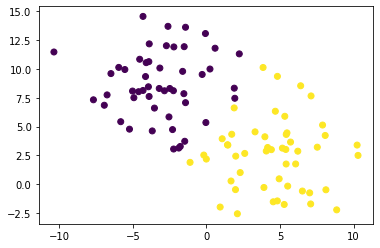

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
print (f"X shape: {X.shape}")
print (f"y shape: {y.shape}")

In [4]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Function: Fit Model, Evaluate Performance, Plot Classification Results

In [5]:
# Function to fit a model to training data, calculate predictions, and create a residuals chart
def gen_classification(a_model):
    # Get the name of this model
    m_name = str(a_model).split("(",1)[0]
    
    # Get the solver used with this model
    m_solver = str(a_model).split("solver=")[1].split(",")[0].replace("'","").replace('"','')
    
    # Fit the data to the scaled data
    m_fit_time = %timeit -n1 -r1 -o a_model.fit(X_train, y_train)

    # Make predictions using both test and training data
    y_predicted_test = a_model.predict(X_test)
    y_predicted_train = a_model.predict(X_train)
    
    # Flag points that were classified incorrectly
    y_predicted_test_errors = y_test - y_predicted_test
    y_predicted_train_errors = y_train - y_predicted_train

    # Plot the training and test data, with prediction errors highlighted in different color

    # Generate a plot
    plt.scatter(X_test[:,0], X_test[:,1], c=y_predicted_test_errors)
    plt.scatter(X_train[:,0], X_train[:,1], c=y_predicted_train_errors)
    
    # plt.legend()

    plt.title(f"Classification Results - Model: {m_name}")
    plt.show()

    # Calculate Model performance: MSE and R2
    m_score_test = a_model.score(X_test, y_test)
    m_score_train = a_model.score(X_train, y_train)

    print(f"Performance - Model: {m_name}\nScore - Test Data: {m_score_test}, Training Data: {m_score_train}")
    print(f"coef_: {a_model.coef_}, intercept_: {a_model.intercept_}, n_iter_: {a_model.n_iter_}, ")
    a_result = {
        'model': m_name,
        'solver': m_solver,
        'fit_time': m_fit_time.average,
        'n_iter': a_model.n_iter_,
        'score_test': m_score_test,
        'score_train': m_score_train
    }
    
    return a_result

In [6]:
ptext = "LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)"

In [7]:
ptext.split("solver=")[1].split(",")[0].replace("'","").replace('"','')

'liblinear'

In [8]:
# Gather results for summary in a dataframe later
model_results = []

## Classification Model: Logistic Regression / Solver: liblinear

In [9]:
# Create classifier
classifier = LogisticRegression(solver='liblinear')
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

6.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


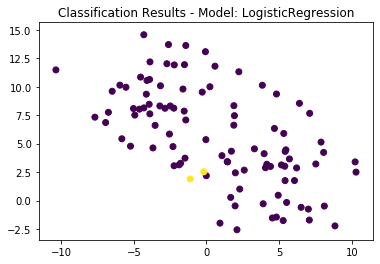

Performance - Model: LogisticRegression
Score - Test Data: 1.0, Training Data: 0.9733333333333334
coef_: [[ 1.12106444 -0.47513723]], intercept_: [1.29157877], n_iter_: [7], 


In [10]:
r = gen_classification(classifier)
model_results.append( {
    'Classifier': r['model'],
    'Solver': r['solver'],
    'Fit Time': r['fit_time'],
    'Iterations': r['n_iter'],
    'Score-Testing Data': r['score_test'],
    'Score-Training Data': r['score_train'] } )

## Classification Model: Logistic Regression / Solver: newton-cg

In [11]:
# Create classifier
classifier = LogisticRegression(solver='newton-cg')
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

7.24 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


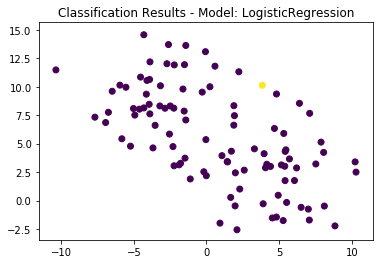

Performance - Model: LogisticRegression
Score - Test Data: 0.96, Training Data: 1.0
coef_: [[ 1.40244996 -1.03085451]], intercept_: [4.48159787], n_iter_: [11], 


In [12]:
r = gen_classification(classifier)
model_results.append( {
    'Classifier': r['model'],
    'Solver': r['solver'],
    'Fit Time': r['fit_time'],
    'Iterations': r['n_iter'],
    'Score-Testing Data': r['score_test'],
    'Score-Training Data': r['score_train'] } )

## Classification Model: Logistic Regression / Solver: lbfgs

In [13]:
# Create classifier
classifier = LogisticRegression(solver='lbfgs')
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

4.19 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


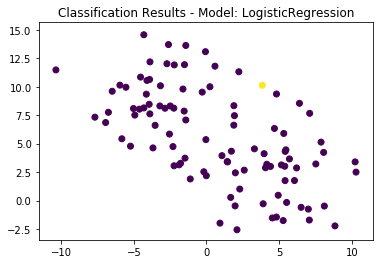

Performance - Model: LogisticRegression
Score - Test Data: 0.96, Training Data: 1.0
coef_: [[ 1.40245029 -1.03085438]], intercept_: [4.48159716], n_iter_: [18], 


In [14]:
r = gen_classification(classifier)
model_results.append( {
    'Classifier': r['model'],
    'Solver': r['solver'],
    'Fit Time': r['fit_time'],
    'Iterations': r['n_iter'],
    'Score-Testing Data': r['score_test'],
    'Score-Training Data': r['score_train'] } )

## Classification Model: Logistic Regression / Solver: sag

In [15]:
# Create classifier
classifier = LogisticRegression(solver='sag')
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

6.83 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


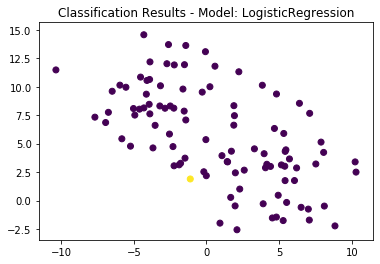

Performance - Model: LogisticRegression
Score - Test Data: 1.0, Training Data: 0.9866666666666667
coef_: [[ 1.14088665 -0.62146186]], intercept_: [2.22743542], n_iter_: [100], 


In [16]:
r = gen_classification(classifier)
model_results.append( {
    'Classifier': r['model'],
    'Solver': r['solver'],
    'Fit Time': r['fit_time'],
    'Iterations': r['n_iter'],
    'Score-Testing Data': r['score_test'],
    'Score-Training Data': r['score_train'] } )

## Classification Model: Logistic Regression / Solver: saga

In [17]:
# Create classifier
classifier = LogisticRegression(solver='liblinear')
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

1.21 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


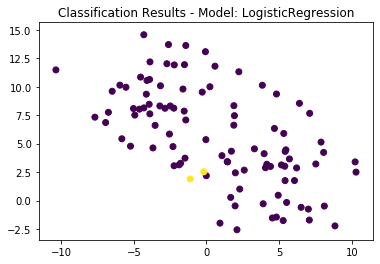

Performance - Model: LogisticRegression
Score - Test Data: 1.0, Training Data: 0.9733333333333334
coef_: [[ 1.12106444 -0.47513723]], intercept_: [1.29157877], n_iter_: [7], 


In [18]:
r = gen_classification(classifier)
model_results.append( {
    'Classifier': r['model'],
    'Solver': r['solver'],
    'Fit Time': r['fit_time'],
    'Iterations': r['n_iter'],
    'Score-Testing Data': r['score_test'],
    'Score-Training Data': r['score_train'] } )

## Summary

In [19]:
summary_df = pd.DataFrame( model_results,
          columns=['Classifier', 'Solver', 'Fit Time', 'Iterations', 'Score-Testing Data', 'Score-Training Data'])
summary_df

,Classifier,Solver,Fit Time,Iterations,Score-Testing Data,Score-Training Data
0,LogisticRegression,liblinear,0.006905,[7],1.00,0.973333
1,LogisticRegression,newton-cg,0.007238,[11],0.96,1.000000
2,LogisticRegression,lbfgs,0.004192,[18],0.96,1.000000
3,LogisticRegression,sag,0.006829,[100],1.00,0.986667
4,LogisticRegression,liblinear,0.001215,[7],1.00,0.973333
